In [1]:
from pycaret.datasets import get_data
dataset = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
import pandas as pd

In [6]:
dataset=dataset.drop(['department','average_montly_hours'],axis=1)

In [7]:
data_seen = dataset.sample(frac=0.95, random_state=780).reset_index(drop=True)
data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (14249, 8)
Unseen Data For Predictions: (750, 8)


In [8]:
from pycaret.classification import *

In [9]:
setting_up = setup(data = data_seen, target = 'left', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(14249, 8)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.9810,0.9863,0.9464,0.9728,0.9593,0.9469,0.9471,0.1263
1,Extreme Gradient Boosting,0.9799,0.9889,0.9417,0.9731,0.9571,0.9440,0.9443,1.3711
2,Extra Trees Classifier,0.9795,0.9879,0.9574,0.9567,0.9569,0.9435,0.9436,0.5548
3,Light Gradient Boosting Machine,0.9792,0.9910,0.9354,0.9763,0.9553,0.9418,0.9422,0.2344
4,CatBoost Classifier,0.9775,0.9907,0.9341,0.9703,0.9518,0.9372,0.9375,7.3134
5,Decision Tree Classifier,0.9720,0.9674,0.9561,0.9284,0.9420,0.9235,0.9238,0.0421
6,Gradient Boosting Classifier,0.9711,0.9839,0.9172,0.9594,0.9378,0.9190,0.9195,1.4040
7,K Neighbors Classifier,0.9594,0.9777,0.9122,0.9169,0.9144,0.8877,0.8879,0.2294
8,Ada Boost Classifier,0.9496,0.9743,0.8788,0.9064,0.8921,0.8592,0.8596,0.5493
9,SVM - Linear Kernel,0.8898,0.0000,0.8188,0.7433,0.7790,0.7059,0.7075,0.0712


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9870,0.9929,0.9620,0.9828,0.9723,0.9638,0.9639
1,0.9800,0.9858,0.9494,0.9657,0.9574,0.9443,0.9444
2,0.9810,0.9854,0.9451,0.9739,0.9593,0.9469,0.9471
3,0.9739,0.9826,0.9156,0.9731,0.9435,0.9266,0.9273
4,0.9769,0.9870,0.9367,0.9652,0.9507,0.9357,0.9359
5,0.9840,0.9799,0.9367,0.9955,0.9652,0.9548,0.9555
6,0.9829,0.9886,0.9578,0.9701,0.9639,0.9527,0.9528
7,0.9850,0.9822,0.9578,0.9784,0.9680,0.9582,0.9583
8,0.9789,0.9933,0.9619,0.9498,0.9558,0.9420,0.9420
9,0.9799,0.9856,0.9407,0.9737,0.9569,0.9438,0.9441


In [12]:
tuned_model = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9820,0.9928,0.9451,0.9782,0.9614,0.9496,0.9499
1,0.9760,0.9888,0.9367,0.9610,0.9487,0.9330,0.9331
2,0.9770,0.9915,0.9325,0.9693,0.9505,0.9355,0.9358
3,0.9739,0.9854,0.9198,0.9689,0.9437,0.9268,0.9273
4,0.9749,0.9861,0.9156,0.9775,0.9455,0.9293,0.9301
5,0.9779,0.9838,0.9156,0.9909,0.9518,0.9375,0.9387
6,0.9850,0.9902,0.9578,0.9784,0.9680,0.9582,0.9583
7,0.9809,0.9837,0.9367,0.9823,0.9590,0.9466,0.9470
8,0.9769,0.9944,0.9364,0.9651,0.9505,0.9355,0.9357
9,0.9819,0.9902,0.9280,0.9955,0.9605,0.9488,0.9498


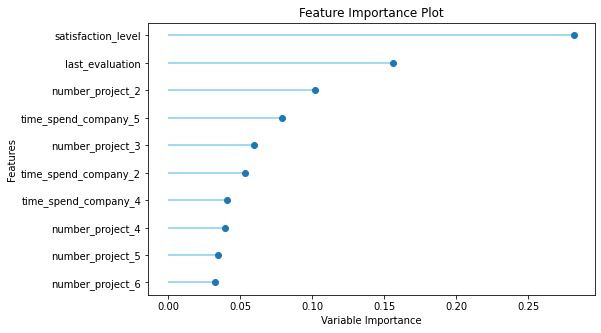

In [13]:

plot_model(tuned_model, plot = 'feature')

In [14]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9799,0.9874,0.9429,0.9716,0.957,0.9439,0.9441


In [15]:
final = finalize_model(tuned_model)

In [17]:
print(final)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [18]:
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,salary,left,Label,Score
0,0.11,0.89,6,4,0,0,low,1,1,1.0000
1,0.41,0.54,2,3,0,0,low,1,1,1.0000
2,0.87,0.88,5,5,0,0,low,1,1,0.9381
3,0.45,0.48,2,3,0,0,low,1,1,1.0000
4,0.40,0.46,2,3,0,0,low,1,1,0.9545


In [19]:
save_model(final,'Final_model')

Transformation Pipeline and Model Succesfully Saved


In [ ]:
dataset['satisfaction_level']